# Question 1

In [103]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [104]:
# Defining ticker name, start and end dates
stock_ticker = 'XOM'
start_date = '2015-01-01'
end_date = '2019-12-31'

In [129]:
# Download the daily data for XOM
daily_data = yf.download(stock_ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [130]:
# Resampling Adj Close data into monthly frequency
monthly_data = daily_data['Adj Close'].resample('MS').last()
monthly_data = pd.DataFrame(monthly_data)
monthly_data

,Adj Close
Date,
2015-01-01,58.472115
2015-02-01,59.667004
2015-03-01,57.281410
2015-04-01,58.878540
2015-05-01,57.891064
2015-06-01,56.532124
2015-07-01,53.821018
2015-08-01,51.601852
2015-09-01,50.991463


In [131]:
# Computing monthly log returns using the Adj Close data
monthly_data['Log_Returns'] = np.log(monthly_data / monthly_data.shift(1))

In [132]:
# Calculating the annualized return using the mean of the monthly log returns * 12 and converting it into a percentage
annualised_return = monthly_data['Log_Returns'].mean() * 12

In [133]:
# Printing the result of annualised return
print(f'Annualised Return: {annualized_return * 100:.2f}%')

Annualised Return: -0.74%


In [134]:
# Calculating the annualized volatility by multiplying the standard deviation of monthly returns with the square root of the months in a year
annualised_volatility = monthly_data['Log_Returns'].std() * np.sqrt(12)

In [135]:
# Printing the result of annualised volatility
print(f'Annualised Volatility: {annualised_volatility * 100:.2f}%')

Annualised Volatility: 17.68%


In [136]:
pip install yesg

Note: you may need to restart the kernel to use updated packages.


In [137]:
import yesg

In [138]:
# Downloading the ESG Scores
ESG = yesg.get_historic_esg('XOM')
ESG

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,66.00,51.00,76.00,69.00
2014-10-01,65.00,51.00,76.00,69.00
2014-11-01,66.00,51.00,76.00,69.00
2014-12-01,66.00,51.00,76.00,69.00
2015-01-01,65.00,51.00,73.00,69.00
...,...,...,...,...
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,36.46,18.51,9.82,8.14
2022-06-01,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'ESG for Exxon Mobil Corp.')

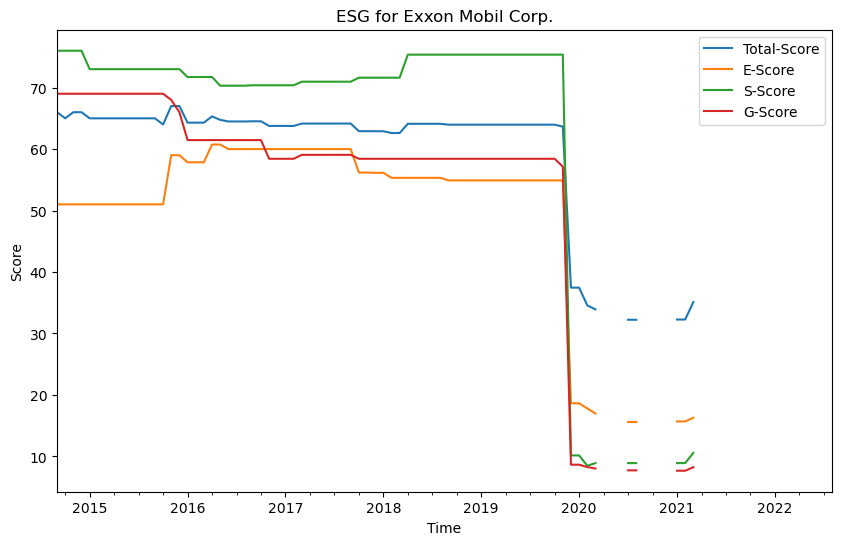

In [158]:
ESG.plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Score')
plt.title('ESG for Exxon Mobil Corp.')

In [159]:
# Selecting only the Total Score and store it into a separate dataframe, slicing it into the same timeframe
ESG_Total = pd.DataFrame(ESG['Total-Score'])
ESG_Total = ESG_Total['2015-01-01':'2019-12-31']
ESG_Total

,Total-Score
Date,
2015-01-01,65.00
2015-02-01,65.00
2015-03-01,65.00
2015-04-01,65.00
2015-05-01,65.00
2015-06-01,65.00
2015-07-01,65.00
2015-08-01,65.00
2015-09-01,65.00


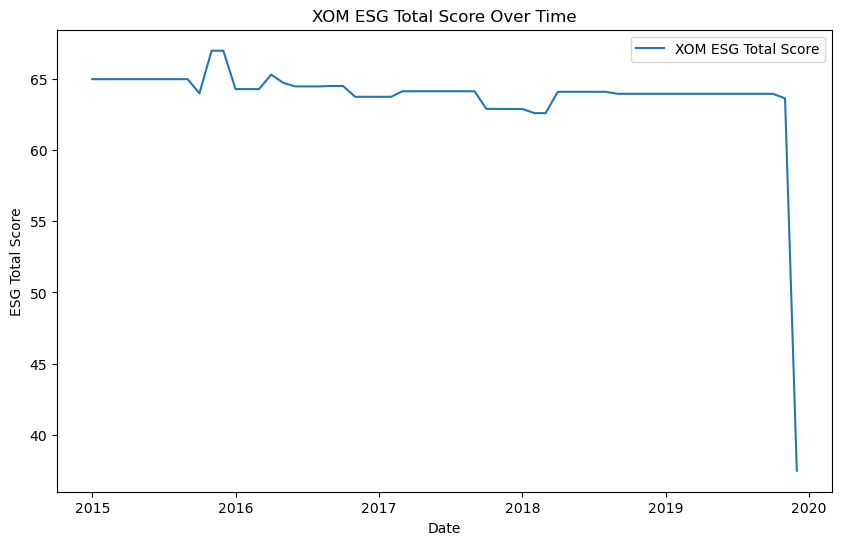

In [160]:
# Plotting the ESG Total Score 
plt.figure(figsize=(10,6))
plt.plot(ESG_Total['2015-01-01':'2019-12-31'], label = 'XOM ESG Total Score')
plt.xlabel('Date')
plt.ylabel('ESG Total Score')
plt.title('XOM ESG Total Score Over Time')
plt.legend()
plt.show()

In [161]:
# Calculate correlation
correlation = monthly_data['Adj Close'].corr(ESG_Total['Total-Score'])

In [162]:
# Print the correlation
print(f"The correlation between the monthly log returns and ESG Score from Jan 2015 to Dec 2019 is {correlation:.4f}")

The correlation between the monthly log returns and ESG Score from Jan 2015 to Dec 2019 is 0.0335


# Question 2

In [144]:
# Importing two more to facilitate analysis for this question
from datetime import datetime
from meteostat import Point, Daily

In [145]:
# Setting the time period
start = datetime(2022, 5, 1)
end = datetime(2022, 5, 31)

In [147]:
# Providing the geographical coordinates (latitude, longitude, and altitude) for Shanghai
location = Point(31.2243, 121.4691, 4)

In [148]:
# Fetch the weather data for Shanghai in May 20222
Shanghai_data = Daily(location, start, end)
Shanghai_data = Shanghai_data.fetch()

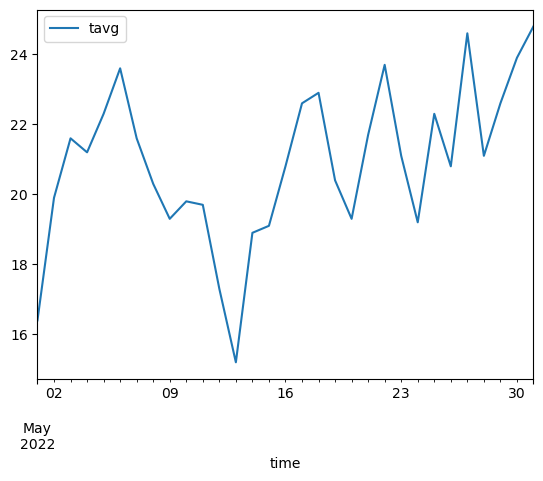

In [150]:
# Visualising the average daily temperature with a line chart
Shanghai_data.plot(y=['tavg'])
plt.show()

In [154]:
T_base = 18
cdds = [max(temp - T_base, 0) for temp in Shanghai_data.tavg]
cdds

[0,
 1.8999999999999986,
 3.6000000000000014,
 3.1999999999999993,
 4.300000000000001,
 5.600000000000001,
 3.6000000000000014,
 2.3000000000000007,
 1.3000000000000007,
 1.8000000000000007,
 1.6999999999999993,
 0,
 0,
 0.8999999999999986,
 1.1000000000000014,
 2.8000000000000007,
 4.600000000000001,
 4.899999999999999,
 2.3999999999999986,
 1.3000000000000007,
 3.6999999999999993,
 5.699999999999999,
 3.1000000000000014,
 1.1999999999999993,
 4.300000000000001,
 2.8000000000000007,
 6.600000000000001,
 3.1000000000000014,
 4.600000000000001,
 5.899999999999999,
 6.800000000000001]